<a href="https://colab.research.google.com/github/Riturajkumari/Support_vector/blob/main/Support_vector_machine_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. What is the mathematical formula for a linear SVM?**






- the equation of a hyperplane is w.x+b=0 where w is a vector normal to hyperplane and b is an offset.
- If the value of w.x+b>0 then positive point otherwise it is a negative point.

**Q2. What is the objective function of a linear SVM?**

- The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. 

**Q3. What is the kernel trick in SVM?**

- A Kernel Trick is a simple method where a Non Linear data is projected onto a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane. 
- In kernel methods, the data set X is represented by an n x n kernel matrix of pairwise similarity comparisons where the entries (i, j) are defined by the kernel function: k(xi, xj). 

**Q4. What is the role of support vectors in SVM Explain with example.?**

- Support Vectors: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.
   - Margin: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. 
     -  There are two types of margins :
      - hard margin and soft margin. 

**Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?**

- When the data is linearly separable, and we don t want to have any misclassifications, we use SVM with a hard margin. 
- when a linear boundary is not feasible, or we want to allow some misclassifications in the hope of achieving better generality, we can opt for a soft margin for our classifier.

**Q6. SVM Implementation through Iris dataset**

-  Load the iris dataset from the scikit-learn library and split it into a training set and a testing set
- Train a linear SVM classifier on the training set and predict the labels for the testing set
- Compute the accuracy of the model on the testing set
- Plot the decision boundaries of the trained model using two of the features.
- Try different values of the regularisation parameter C and see how it affects the performance of
the model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# check the null
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [ ]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [ ]:
X

array([[-0.03049475,  1.69298675],
       [-0.36341981,  2.0784984 ],
       [ 2.06442888, -1.46610159],
       ...,
       [-0.70778673, -0.65121822],
       [ 1.23081248,  0.89358314],
       [-1.20244561,  1.97711081]])

In [ ]:
y

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

<Axes: xlabel='0', ylabel='1'>

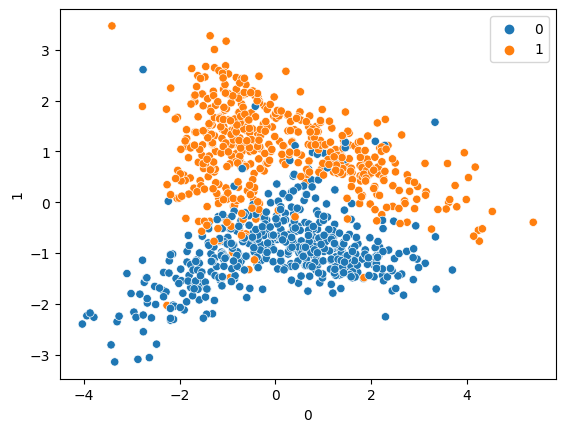

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear')

In [ ]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
svc.coef_

array([[0.08892293, 1.69831468]])

In [ ]:
## Prediction
y_pred=svc.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       130
           1       0.89      0.93      0.91       120

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[116  14]
 [  9 111]]
0.908


## Hyperparametere Tuning With SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [ ]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.880 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       130
           1       0.89      0.93      0.91       120

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[116  14]
 [  9 111]]
0.908


**Bonus task:** Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [30]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
# Loading and exploring our dataset
df = load_dataset('penguins')
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [32]:
# null value
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [33]:
# Dropping missing records
df = df.dropna()
print(len(df))


333


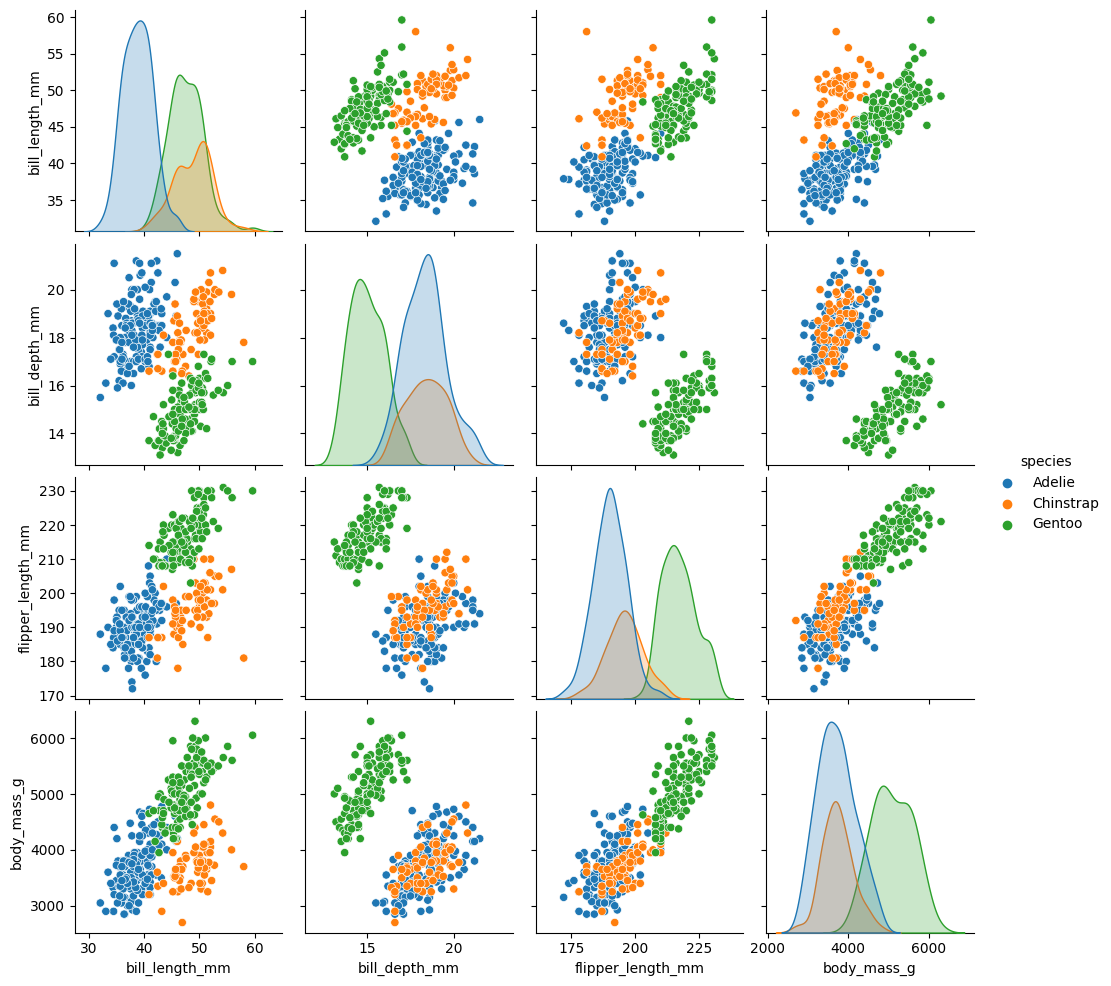

In [34]:
# Plotting our penguin species features
pairplot(df, hue='species')
plt.show()

In [35]:
# Multi-Class Classification with SVM with Sklearn
# Splitting our data
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [38]:
# The SVC Class from Sklearn
svc=SVC( 
    C=1.0,                          # The regularization parameter
    kernel='rbf',                   # The kernel type used 
    degree=3,                       # Degree of polynomial function 
    gamma='scale',                  # The kernel coefficient
    coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
    shrinking=True,                 # To use shrinking heuristic
    probability=False,              # Enable probability estimates
    tol=0.001,                      # Stopping crierion
    cache_size=200,                 # Size of kernel cache
    class_weight=None,              # The weight of each class
    verbose=False,                  # Enable verbose output
    max_iter=- 1,                   # Hard limit on iterations
    decision_function_shape='ovr',  # One-vs-rest or one-vs-one
    break_ties=False,               # How to handle breaking ties
    random_state=None               # Random state of the model
)

In [39]:
# Building and training our model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
# Making predictions with our data
predictions = clf.predict(X_test)
print(predictions[:5])

['Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo']


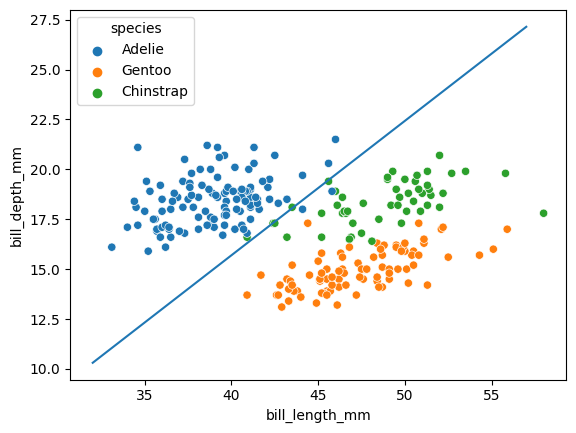

In [43]:
# Visualizing the linear function for our SVM classifier
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32,57)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

scatterplot(data = X_train, x='bill_length_mm', y='bill_depth_mm', hue=y_train)
plt.plot(x_visual, y_visual)
plt.show()